In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/task 01/DataSet/weather_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


In [4]:
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [5]:
df.tail()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269
310,2023-11-07,19.389714,37.717416,9.388371,No Rain,25.929676,983.134701


In [6]:
df['rain_or_not'].value_counts()

,count
rain_or_not,
Rain,198
No Rain,113


In [7]:
df.isnull().sum()

,0
date,0
avg_temperature,15
humidity,15
avg_wind_speed,15
rain_or_not,0
cloud_cover,15
pressure,0


In [8]:
df['avg_temperature'].max()

35.0

In [9]:
df['humidity'].max()

90.0

In [10]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [11]:
df[df.isnull().any(axis=1)]

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
12,2023-01-13,NaN,NaN,NaN,No Rain,NaN,1022.950823
15,2023-01-16,NaN,NaN,NaN,Rain,NaN,1011.022515
16,2023-01-17,NaN,NaN,NaN,No Rain,NaN,963.535408
44,2023-02-14,NaN,NaN,NaN,Rain,NaN,1006.016818
47,2023-02-17,NaN,NaN,NaN,Rain,NaN,991.879332
52,2023-02-22,NaN,NaN,NaN,No Rain,NaN,1015.417460
57,2023-02-27,NaN,NaN,NaN,Rain,NaN,1010.852727
71,2023-03-13,NaN,NaN,NaN,No Rain,NaN,1004.353822
111,2023-04-22,NaN,NaN,NaN,Rain,NaN,1032.210316
114,2023-04-25,NaN,NaN,NaN,Rain,NaN,1046.447665


In [12]:
df['avg_temperature'] = df['avg_temperature'].fillna(df['avg_temperature'].mean())
df['humidity'] = df['humidity'].fillna(df['humidity'].mean())
df['avg_wind_speed'] = df['avg_wind_speed'].fillna(df['avg_wind_speed'].mean())
df['cloud_cover'] = df['cloud_cover'].fillna(df['cloud_cover'].mean())

In [13]:
df.isnull().sum()

,0
date,0
avg_temperature,0
humidity,0
avg_wind_speed,0
rain_or_not,0
cloud_cover,0
pressure,0


In [14]:
df['rain_or_not'].value_counts()

,count
rain_or_not,
Rain,198
No Rain,113


In [15]:
#Data set is not fair over Rain and no Rain
#Lets do an oversammpling only for traing dataset before all
#so i split data into to raw sets 21 for test and other fro train
#then oversammpled the train data and merge them together
#to avoid the date being oversammples effect I get the season adn day of the week as 2 separate columsn
# so it will be ok

In [16]:
df['rain'] = df['rain_or_not'].apply(lambda x: 1 if x == 'Rain' else 0)

In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [18]:
# I create this new Columsn to deal with the Date and then I can deal with the season and day of the week which may like more importan to predict rain
# and also tehen I can oversamplled
df['season'] = df['date'].dt.month % 12 // 3 + 1
df['day_of_week'] = df['date'].dt.dayofweek
df['day_season_plus'] = df['day_of_week'] + df['season']
df['day_m_season'] = df['day_of_week'] * df['season']

In [19]:
#Split data into train and test

#no need them anymore
df = df.drop(columns=['date', 'rain_or_not'])

train_size = int(len(df)-21)

test_set = df[train_size:]
train_set = df[:train_size]

X_train = train_set.drop(columns=['rain'])
y_train = train_set['rain']

smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

train_set_oversampled = pd.DataFrame(X_train_sm, columns=X_train.columns)
train_set_oversampled['rain'] = y_train_sm

df = pd.concat([train_set_oversampled, test_set], ignore_index=True)


In [20]:
df.tail()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,season,day_of_week,day_season_plus,day_m_season,rain
352,22.072834,37.756910,4.729355,27.307081,954.564875,4,4,8,16,0
353,19.645885,42.190604,8.092369,51.807877,964.002410,4,5,9,20,0
354,23.884496,36.205508,11.860847,29.872557,977.681431,4,6,10,24,1
355,18.168418,34.785000,4.781288,94.067925,1047.153269,4,0,4,0,0
356,19.389714,37.717416,9.388371,25.929676,983.134701,4,1,5,4,0


In [21]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,season,day_of_week,day_season_plus,day_m_season,rain
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,25.685172,54.091392,7.476032,50.212560,1000.950137,2.521008,2.935574,5.490196,7.661064,0.554622
std,6.738117,18.925293,5.013912,27.914481,28.696900,1.001533,1.981316,2.244354,6.286688,0.497705
min,15.000000,30.000000,0.069480,0.321826,951.240404,1.000000,0.000000,1.000000,0.000000,0.000000
25%,19.649738,33.730270,3.776986,27.625995,975.653006,2.000000,1.000000,4.000000,3.000000,0.000000
50%,25.983840,55.041385,7.556636,49.834827,1002.339091,2.000000,3.000000,5.000000,6.000000,1.000000
75%,31.766657,71.850031,10.608580,74.807318,1026.551290,3.000000,5.000000,7.000000,12.000000,1.000000
max,35.000000,90.000000,56.636041,99.834751,1049.543752,4.000000,6.000000,10.000000,24.000000,1.000000


In [22]:
df.head()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,season,day_of_week,day_season_plus,day_m_season,rain
0,23.745401,46.140905,7.845981,20.851051,992.965681,1,6,7,6,1
1,30.030503,59.876587,5.382457,93.059521,1037.273025,1,0,1,0,1
2,28.365224,51.464618,13.158008,11.636640,1034.193357,1,1,2,1,1
3,27.550929,53.103799,5.886677,81.744971,968.610142,1,2,3,2,1
4,23.639303,57.826186,12.248992,38.062329,1030.264331,1,3,4,3,1


Replace the all Null Values by the mean value of relevent Column

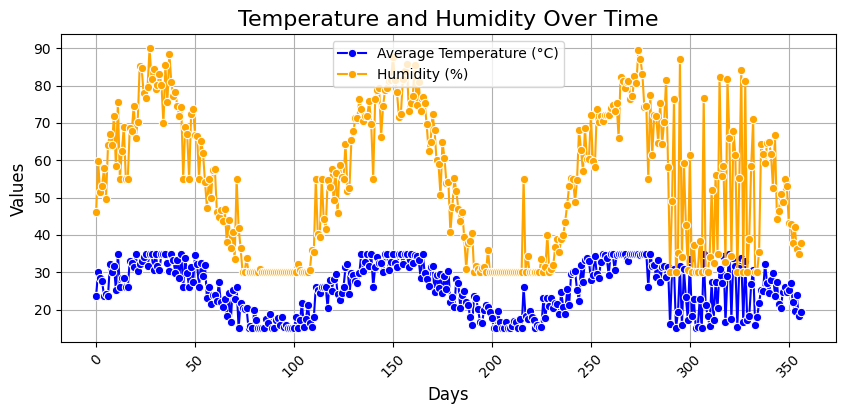

In [23]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df.reset_index(), x='index', y='avg_temperature', label='Average Temperature (°C)', color='blue', marker='o')
sns.lineplot(data=df.reset_index(), x='index', y='humidity', label='Humidity (%)', color='orange', marker='o')

plt.title('Temperature and Humidity Over Time', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



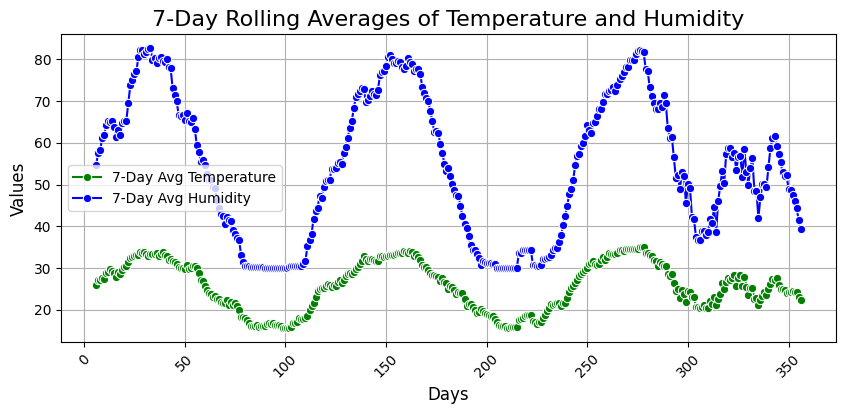

In [24]:
df['rolling_avg_temp'] = df['avg_temperature'].rolling(window=7).mean()
df['rolling_avg_humidity'] = df['humidity'].rolling(window=7).mean()


plt.figure(figsize=(10, 4))
sns.lineplot(data=df.reset_index(), x='index', y='rolling_avg_temp', label='7-Day Avg Temperature', color='green', marker='o')
sns.lineplot(data=df.reset_index(), x='index', y='rolling_avg_humidity', label='7-Day Avg Humidity', color='blue', marker='o')

plt.title('7-Day Rolling Averages of Temperature and Humidity', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


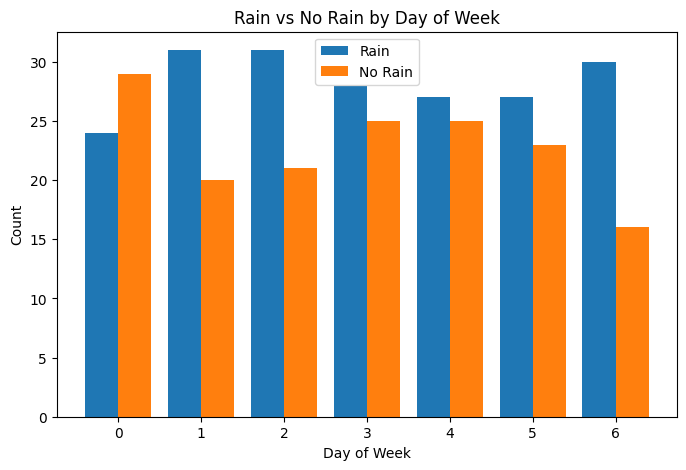

In [25]:
counts = df.groupby(['day_of_week', 'rain']).size().unstack(fill_value=0)

x = np.arange(len(counts.index))
width = 0.4

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width/2, counts[1], width, label='Rain')
ax.bar(x + width/2, counts[0], width, label='No Rain')

ax.set_xlabel('Day of Week')
ax.set_ylabel('Count')
ax.set_title('Rain vs No Rain by Day of Week')
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.legend()

plt.show()

In [26]:
df.head()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,season,day_of_week,day_season_plus,day_m_season,rain,rolling_avg_temp,rolling_avg_humidity
0,23.745401,46.140905,7.845981,20.851051,992.965681,1,6,7,6,1,NaN,NaN
1,30.030503,59.876587,5.382457,93.059521,1037.273025,1,0,1,0,1,NaN,NaN
2,28.365224,51.464618,13.158008,11.636640,1034.193357,1,1,2,1,1,NaN,NaN
3,27.550929,53.103799,5.886677,81.744971,968.610142,1,2,3,2,1,NaN,NaN
4,23.639303,57.826186,12.248992,38.062329,1030.264331,1,3,4,3,1,NaN,NaN


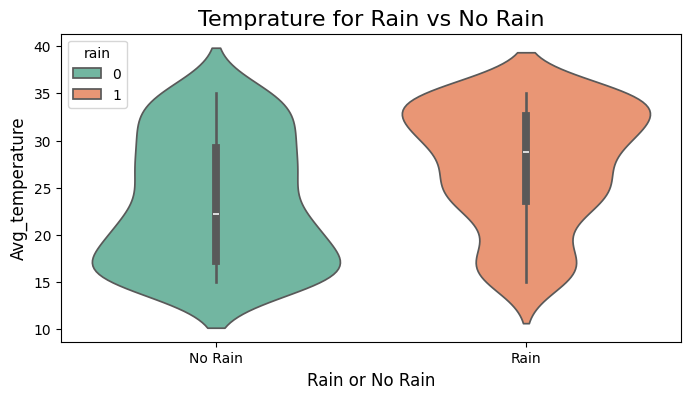

In [27]:
plt.figure(figsize=(8, 4))

sns.violinplot(data=df, x='rain', y='avg_temperature', hue='rain', palette='Set2')

plt.title('Temprature for Rain vs No Rain', fontsize=16)
plt.xlabel('Rain or No Rain', fontsize=12)
plt.ylabel('Avg_temperature', fontsize=12)
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.show()

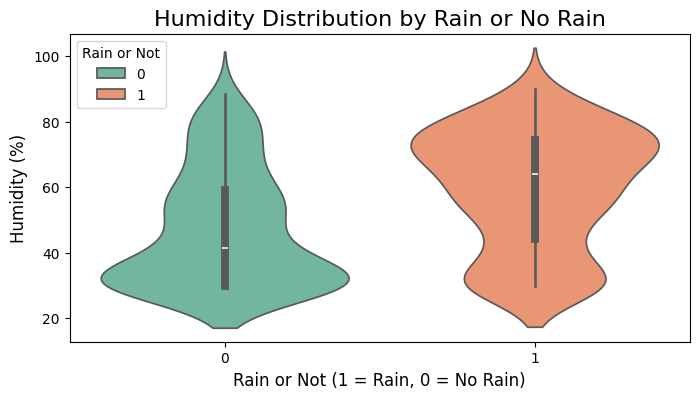

In [28]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='rain', y='humidity', hue='rain', palette='Set2')
plt.title('Humidity Distribution by Rain or No Rain', fontsize=16)
plt.xlabel('Rain or Not (1 = Rain, 0 = No Rain)', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.legend(title='Rain or Not')
plt.show()

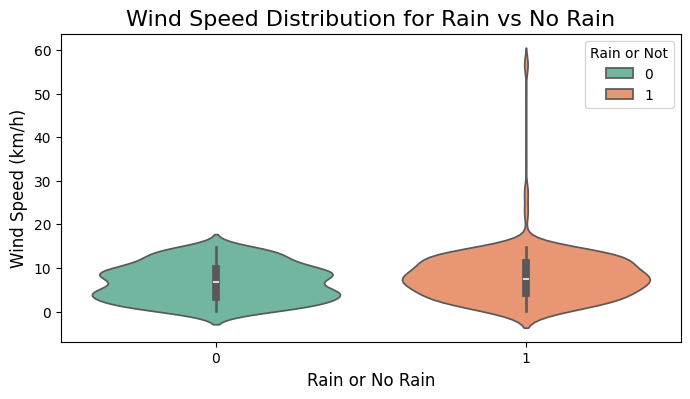

In [29]:
plt.figure(figsize=(8, 4))

sns.violinplot(data=df, x='rain', y='avg_wind_speed',hue='rain', palette='Set2')

plt.title('Wind Speed Distribution for Rain vs No Rain', fontsize=16)
plt.xlabel('Rain or No Rain', fontsize=12)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.legend(title='Rain or Not')
plt.show()


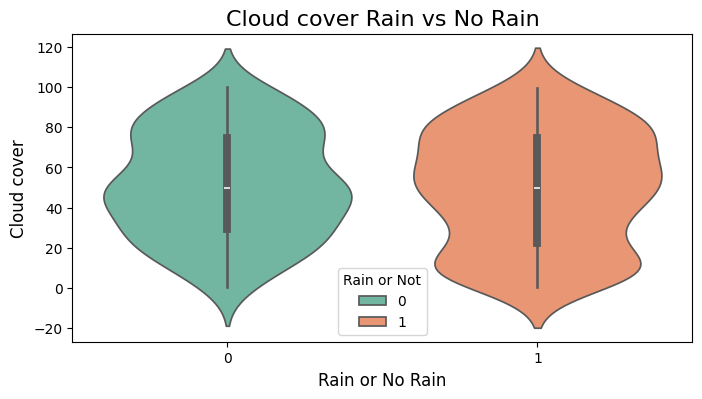

In [30]:
plt.figure(figsize=(8, 4))

sns.violinplot(data=df, x='rain', y='cloud_cover',hue='rain', palette='Set2')

plt.title('Cloud cover Rain vs No Rain', fontsize=16)
plt.xlabel('Rain or No Rain', fontsize=12)
plt.ylabel('Cloud cover', fontsize=12)
plt.legend(title='Rain or Not')
plt.show()

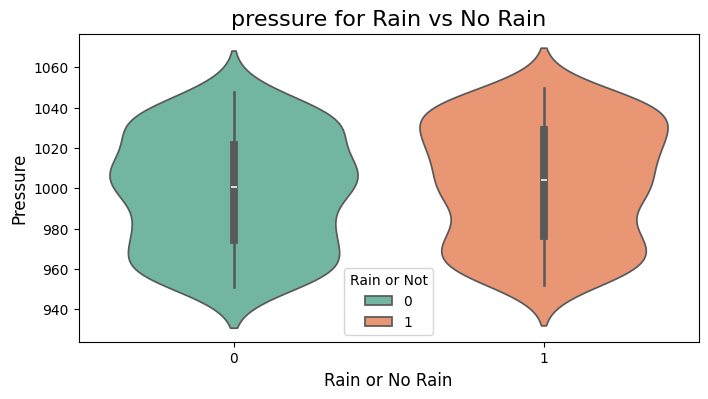

In [31]:
plt.figure(figsize=(8, 4))

sns.violinplot(data=df, x='rain', y='pressure',hue='rain', palette='Set2')

plt.title('pressure for Rain vs No Rain', fontsize=16)
plt.xlabel('Rain or No Rain', fontsize=12)
plt.ylabel('Pressure', fontsize=12)
plt.legend(title='Rain or Not')
plt.show()

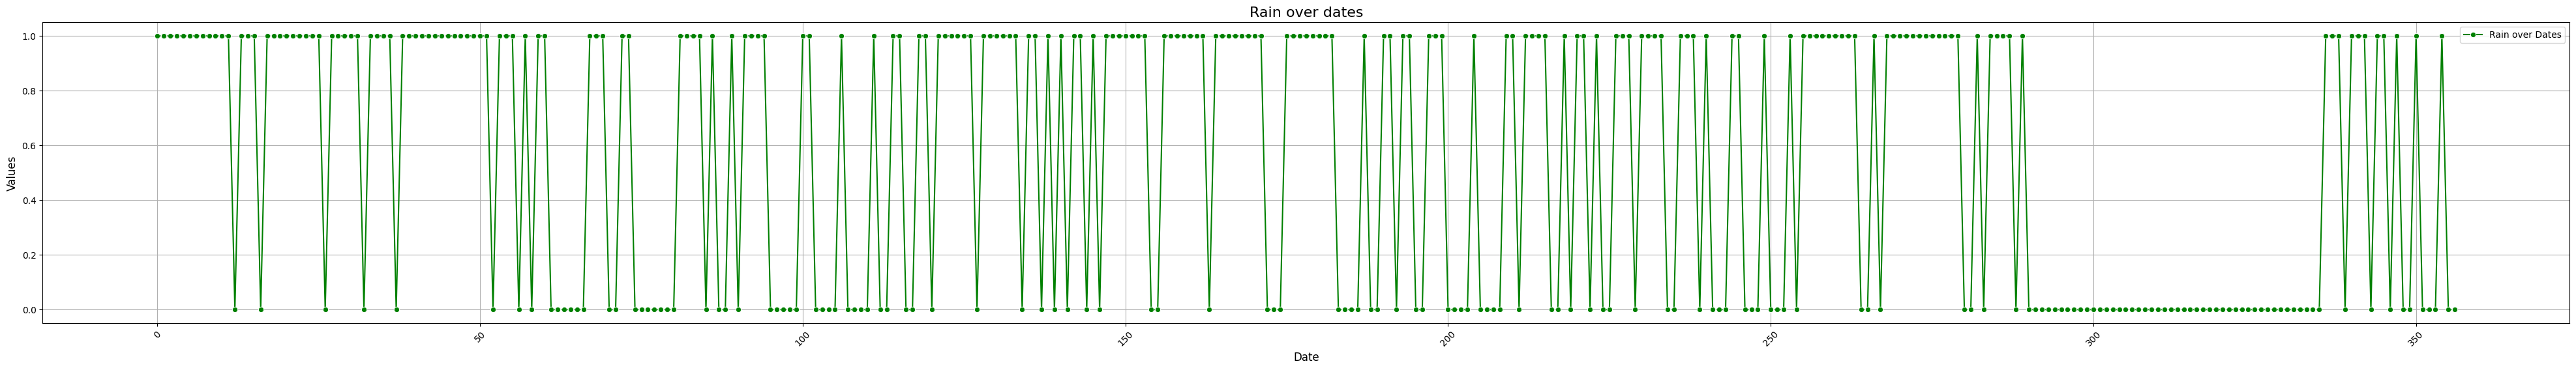

In [32]:
plt.figure(figsize=(50, 6))
sns.lineplot(data=df.reset_index(), x='index', y='rain', label='Rain over Dates', color='green', marker='o')

plt.title('Rain over dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

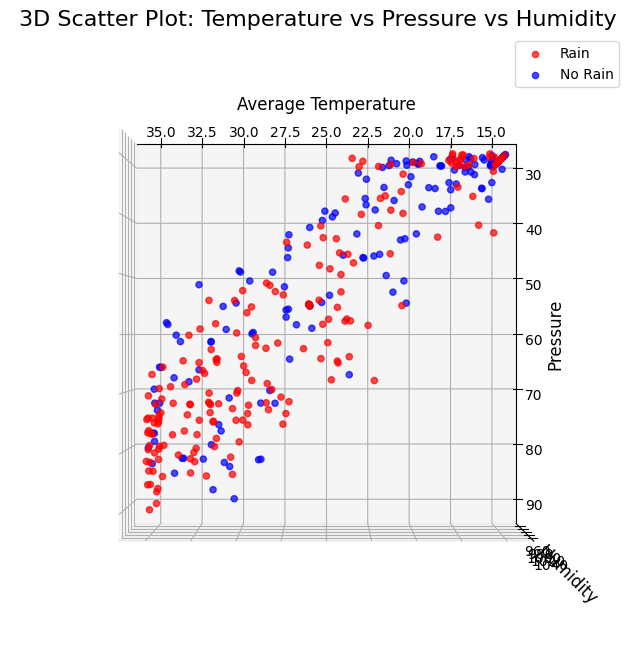

In [33]:
temperature = df['avg_temperature']
humidity = df['humidity']
third = df['pressure']
rain = df['rain']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter for rain
ax.scatter(
    temperature[rain == 1],
    humidity[rain == 1],
    third[rain==1],
    color='red',
    label='Rain',
    alpha=0.7
)

# Scatter for no rain
ax.scatter(
    temperature[rain == 0],
    humidity[rain == 0],
    third[rain==0],
    color='blue',
    label='No Rain',
    alpha=0.7
)


ax.set_xlabel('Average Temperature', fontsize=12)
ax.set_ylabel('Pressure', fontsize=12)
ax.set_zlabel('Humidity', fontsize=12)
ax.set_title('3D Scatter Plot: Temperature vs Pressure vs Humidity', fontsize=16)

ax.view_init(elev=90, azim=90)

ax.legend()

plt.show()


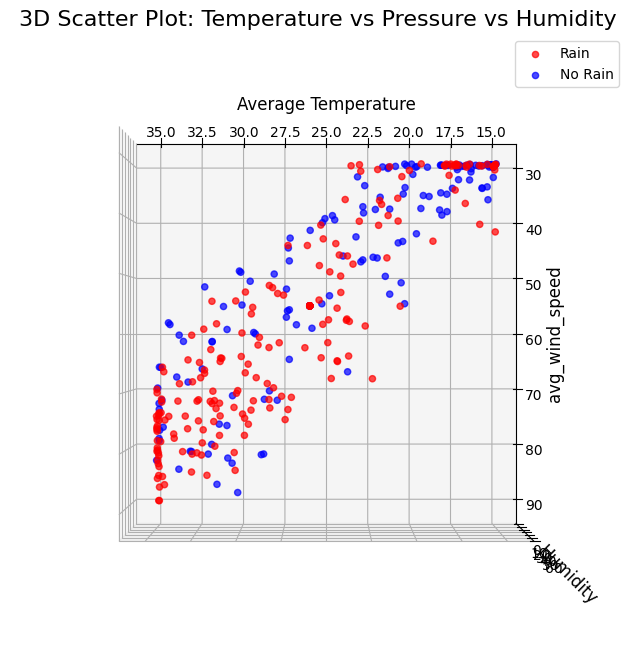

In [34]:
perature = df['avg_temperature']
humidity = df['humidity']
third = df['avg_wind_speed']
rain = df['rain']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter for rain
ax.scatter(
    temperature[rain == 1],
    humidity[rain == 1],
    third[rain==1],
    color='red',
    label='Rain',
    alpha=0.7
)

# Scatter for no rain
ax.scatter(
    temperature[rain == 0],
    humidity[rain == 0],
    third[rain==0],
    color='blue',
    label='No Rain',
    alpha=0.7
)


ax.set_xlabel('Average Temperature', fontsize=12)
ax.set_ylabel('avg_wind_speed', fontsize=12)
ax.set_zlabel('Humidity', fontsize=12)
ax.set_title('3D Scatter Plot: Temperature vs Pressure vs Humidity', fontsize=16)

ax.view_init(elev=90, azim=90)

ax.legend()

plt.show()


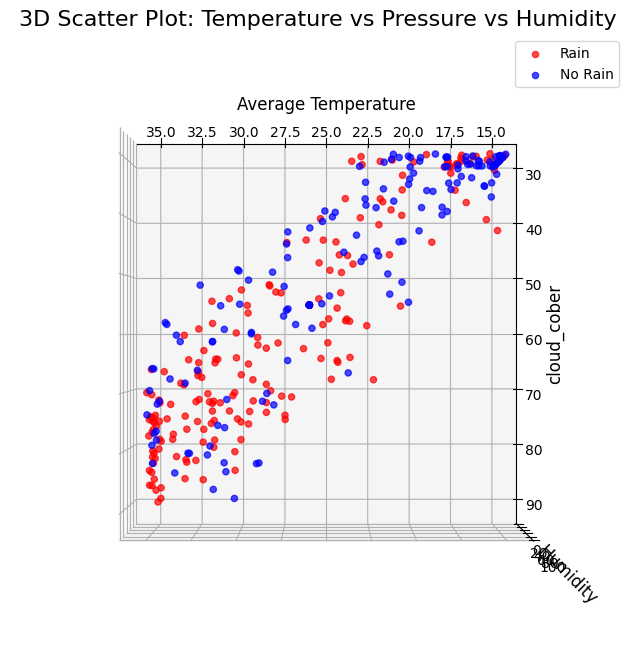

In [35]:
perature = df['avg_temperature']
humidity = df['humidity']
third = df['cloud_cover']
rain = df['rain']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter for rain
ax.scatter(
    temperature[rain == 1],
    humidity[rain == 1],
    third[rain==1],
    color='red',
    label='Rain',
    alpha=0.7
)

# Scatter for no rain
ax.scatter(
    temperature[rain == 0],
    humidity[rain == 0],
    third[rain==0],
    color='blue',
    label='No Rain',
    alpha=0.7
)


ax.set_xlabel('Average Temperature', fontsize=12)
ax.set_ylabel('cloud_cober', fontsize=12)
ax.set_zlabel('Humidity', fontsize=12)
ax.set_title('3D Scatter Plot: Temperature vs Pressure vs Humidity', fontsize=16)

ax.view_init(elev=90, azim=90)

ax.legend()

plt.show()


In [36]:
#Rain Presentage of the season
season_rain_precentage = df.groupby('season')['rain'].mean()
df['rain_precentage_of_season'] = df['season'].map(season_rain_precentage)


In [37]:
#Rain presentage of the day of the week
day_rain_precentage = df.groupby('day_of_week')['rain'].mean()
df['rain_precentage_of_day'] = df['day_of_week'].map(day_rain_precentage)

In [38]:
df.head(10)

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,season,day_of_week,day_season_plus,day_m_season,rain,rolling_avg_temp,rolling_avg_humidity,rain_precentage_of_season,rain_precentage_of_day
0,23.745401,46.140905,7.845981,20.851051,992.965681,1,6,7,6,1,NaN,NaN,0.809524,0.652174
1,30.030503,59.876587,5.382457,93.059521,1037.273025,1,0,1,0,1,NaN,NaN,0.809524,0.452830
2,28.365224,51.464618,13.158008,11.636640,1034.193357,1,1,2,1,1,NaN,NaN,0.809524,0.607843
3,27.550929,53.103799,5.886677,81.744971,968.610142,1,2,3,2,1,NaN,NaN,0.809524,0.596154
4,23.639303,57.826186,12.248992,38.062329,1030.264331,1,3,4,3,1,NaN,NaN,0.809524,0.528302
5,24.148136,49.703435,6.587024,87.797432,995.818689,1,4,5,4,1,NaN,NaN,0.809524,0.519231
6,23.671006,63.997418,5.654166,86.805669,998.296887,1,5,6,5,1,25.878643,54.587564,0.809524,0.540000
7,32.245441,67.083073,6.940197,80.592540,963.347997,1,6,7,6,1,27.092935,57.579302,0.809524,0.652174
8,30.078517,64.088581,4.520668,79.003044,958.060151,1,0,1,0,1,27.099794,58.181016,0.809524,0.452830
9,31.620631,71.876470,11.214141,30.467914,1022.793931,1,1,2,1,1,27.564852,61.096995,0.809524,0.607843


In [39]:
# To resolve the NAN problem
# I more prefere replace them by mean instead putting 0
df['rolling_avg_humidity'] = df['rolling_avg_humidity'].fillna(df['rolling_avg_humidity'].mean())
df['rolling_avg_temp'] = df['rolling_avg_temp'].fillna(0)

In [40]:
'''
### Ploted the relation of lag data to rain or not of temparature humididty rain pressure avg_wind_speed and cloud cover
lag_days = 9

for i in range(1, lag_days + 1):
    df[f'lag_temp_{i}'] = df['avg_temperature'].shift(i)
    df[f'lag_humidity_{i}'] = df['humidity'].shift(i)
    df[f'lag_rain_{i}'] = df['rain'].shift(i)
    df[f'lag_pressure_{i}'] = df['pressure'].shift(i)
    df[f'lag_wind_{i}'] = df['avg_wind_speed'].shift(i)
    df[f'lag_cloud_{i}'] = df['cloud_cover'].shift(i)

    df[f'lag_temp_{i}'] = df[f'lag_temp_{i}'].fillna(df['avg_temperature'].mean())
    df[f'lag_humidity_{i}'] = df[f'lag_humidity_{i}'].fillna(df['humidity'].mean())
    df[f'lag_rain_{i}'] = df[f'lag_rain_{i}'].fillna(0)
    df[f'lag_pressure_{i}'] = df[f'lag_pressure_{i}'].fillna(df['pressure'].mean())
    df[f'lag_wind_{i}'] = df[f'lag_wind_{i}'].fillna(df['avg_wind_speed'].mean())
    df[f'lag_cloud_{i}'] = df[f'lag_cloud_{i}'].fillna(df['cloud_cover'].mean())

'''

"\n### Ploted the relation of lag data to rain or not of temparature humididty rain pressure avg_wind_speed and cloud cover\nlag_days = 9\n\nfor i in range(1, lag_days + 1):\n    df[f'lag_temp_{i}'] = df['avg_temperature'].shift(i)\n    df[f'lag_humidity_{i}'] = df['humidity'].shift(i)\n    df[f'lag_rain_{i}'] = df['rain'].shift(i)\n    df[f'lag_pressure_{i}'] = df['pressure'].shift(i)\n    df[f'lag_wind_{i}'] = df['avg_wind_speed'].shift(i)\n    df[f'lag_cloud_{i}'] = df['cloud_cover'].shift(i)\n\n    df[f'lag_temp_{i}'] = df[f'lag_temp_{i}'].fillna(df['avg_temperature'].mean())\n    df[f'lag_humidity_{i}'] = df[f'lag_humidity_{i}'].fillna(df['humidity'].mean())\n    df[f'lag_rain_{i}'] = df[f'lag_rain_{i}'].fillna(0)\n    df[f'lag_pressure_{i}'] = df[f'lag_pressure_{i}'].fillna(df['pressure'].mean())\n    df[f'lag_wind_{i}'] = df[f'lag_wind_{i}'].fillna(df['avg_wind_speed'].mean())\n    df[f'lag_cloud_{i}'] = df[f'lag_cloud_{i}'].fillna(df['cloud_cover'].mean())\n\n"

In [41]:
'''
plt.figure(figsize=(10, 8))

lag_columns = ['lag_humidity_1', 'lag_humidity_2', 'lag_humidity_3', 'lag_humidity_4', 'lag_humidity_5', 'lag_humidity_6', 'lag_humidity_7', 'lag_humidity_8', 'lag_humidity_9']


for i, lag_col in enumerate(lag_columns):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=df, x='rain_or_not', y=lag_col, hue='rain_or_not', palette='Set2', legend=False)
    plt.title(f'Humidity Distribution for {lag_col}', fontsize=14)
    plt.xlabel('Rain or No Rain', fontsize=12)
    plt.ylabel('Humidity', fontsize=12)
    plt.xticks([0, 1], ['No Rain', 'Rain'])

plt.tight_layout()
plt.show()
'''

"\nplt.figure(figsize=(10, 8))\n\nlag_columns = ['lag_humidity_1', 'lag_humidity_2', 'lag_humidity_3', 'lag_humidity_4', 'lag_humidity_5', 'lag_humidity_6', 'lag_humidity_7', 'lag_humidity_8', 'lag_humidity_9']\n\n\nfor i, lag_col in enumerate(lag_columns):\n    plt.subplot(3, 3, i + 1)\n    sns.violinplot(data=df, x='rain_or_not', y=lag_col, hue='rain_or_not', palette='Set2', legend=False)\n    plt.title(f'Humidity Distribution for {lag_col}', fontsize=14)\n    plt.xlabel('Rain or No Rain', fontsize=12)\n    plt.ylabel('Humidity', fontsize=12)\n    plt.xticks([0, 1], ['No Rain', 'Rain'])\n\nplt.tight_layout()\nplt.show()\n"

In [42]:
'''
plt.figure(figsize=(10, 8))


lag_columns = ['lag_temp_1', 'lag_temp_2', 'lag_temp_3', 'lag_temp_4', 'lag_temp_5', 'lag_temp_6', 'lag_temp_7', 'lag_temp_8', 'lag_temp_9']

for i, lag_col in enumerate(lag_columns):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=df, x='rain_or_not', y=lag_col, hue='rain_or_not', palette='Set2', legend=False)
    plt.title(f'Humidity Distribution for {lag_col}', fontsize=14)
    plt.xlabel('Rain or No Rain', fontsize=12)
    plt.ylabel('lag Temp', fontsize=12)
    plt.xticks([0, 1], ['No Rain', 'Rain'])

# Adjust layout
plt.tight_layout()
plt.show()
'''

"\nplt.figure(figsize=(10, 8))\n\n\nlag_columns = ['lag_temp_1', 'lag_temp_2', 'lag_temp_3', 'lag_temp_4', 'lag_temp_5', 'lag_temp_6', 'lag_temp_7', 'lag_temp_8', 'lag_temp_9']\n\nfor i, lag_col in enumerate(lag_columns):\n    plt.subplot(3, 3, i + 1)\n    sns.violinplot(data=df, x='rain_or_not', y=lag_col, hue='rain_or_not', palette='Set2', legend=False)\n    plt.title(f'Humidity Distribution for {lag_col}', fontsize=14)\n    plt.xlabel('Rain or No Rain', fontsize=12)\n    plt.ylabel('lag Temp', fontsize=12)\n    plt.xticks([0, 1], ['No Rain', 'Rain'])\n\n# Adjust layout\nplt.tight_layout()\nplt.show()\n"

In [43]:
'''
lag_columns = ['pressure', 'lag_pressure_1', 'lag_pressure_2', 'lag_pressure_3', 'lag_pressure_4', 'lag_pressure_5', 'lag_pressure_6', 'lag_pressure_7', 'lag_pressure_8']

plt.figure(figsize=(10, 8))

for i, lag_col in enumerate(lag_columns):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=df, x='rain_or_not', y=lag_col, hue='rain_or_not', palette='Set2', legend=False, split=True)
    plt.title(f'Humidity Distribution for {lag_col}', fontsize=14)
    plt.xlabel('Rain or No Rain', fontsize=12)
    plt.ylabel('Lag Pressure', fontsize=12)
    plt.xticks([0, 1], ['No Rain', 'Rain'])

plt.tight_layout()
plt.show()

plt.show()
'''

"\nlag_columns = ['pressure', 'lag_pressure_1', 'lag_pressure_2', 'lag_pressure_3', 'lag_pressure_4', 'lag_pressure_5', 'lag_pressure_6', 'lag_pressure_7', 'lag_pressure_8']\n\nplt.figure(figsize=(10, 8))\n\nfor i, lag_col in enumerate(lag_columns):\n    plt.subplot(3, 3, i + 1)\n    sns.violinplot(data=df, x='rain_or_not', y=lag_col, hue='rain_or_not', palette='Set2', legend=False, split=True)\n    plt.title(f'Humidity Distribution for {lag_col}', fontsize=14)\n    plt.xlabel('Rain or No Rain', fontsize=12)\n    plt.ylabel('Lag Pressure', fontsize=12)\n    plt.xticks([0, 1], ['No Rain', 'Rain'])\n\nplt.tight_layout()\nplt.show()\n\nplt.show()\n"

In [44]:
'''
lag_columns = ['avg_wind_speed', 'lag_wind_1', 'lag_wind_2', 'lag_wind_3', 'lag_wind_4', 'lag_wind_5', 'lag_wind_6', 'lag_wind_7', 'lag_wind_8']

plt.figure(figsize=(10, 8))

for i, lag_col in enumerate(lag_columns):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=df, x='rain_or_not', y=lag_col, hue='rain_or_not', palette='Set2', legend=False, split=True)
    plt.title(f'Humidity Distribution for {lag_col}', fontsize=14)
    plt.xlabel('Rain or No Rain', fontsize=12)
    plt.ylabel('Wind', fontsize=12)
    plt.xticks([0, 1], ['No Rain', 'Rain'])

plt.tight_layout()
plt.show()

plt.show()
'''

"\nlag_columns = ['avg_wind_speed', 'lag_wind_1', 'lag_wind_2', 'lag_wind_3', 'lag_wind_4', 'lag_wind_5', 'lag_wind_6', 'lag_wind_7', 'lag_wind_8']\n\nplt.figure(figsize=(10, 8))\n\nfor i, lag_col in enumerate(lag_columns):\n    plt.subplot(3, 3, i + 1)\n    sns.violinplot(data=df, x='rain_or_not', y=lag_col, hue='rain_or_not', palette='Set2', legend=False, split=True)\n    plt.title(f'Humidity Distribution for {lag_col}', fontsize=14)\n    plt.xlabel('Rain or No Rain', fontsize=12)\n    plt.ylabel('Wind', fontsize=12)\n    plt.xticks([0, 1], ['No Rain', 'Rain'])\n\nplt.tight_layout()\nplt.show()\n\nplt.show()\n"

In [45]:
#more effect on the rain is by the lag data of teh humidity and temparature
# but there not significantly different in the effect

In [46]:
df['humidity_vs_temp'] = (df['humidity']*df['avg_temperature'])
#since both influvenced more than others and both change like sinosoidal over the year this may give some sense

df['pressure-humidity'] = df['humidity']/df['pressure'] #this makes sense with rain or not
df['pressure-tepm'] = df['avg_temperature']/df['pressure'] ##this makes sense with rain or not
df['wind-humidity'] = df['humidity']/df['avg_wind_speed'] #this dooes not makes sense with rain or not

df['pressure-humidity_M_pressure-tepm'] = df['pressure-humidity']*df['pressure-tepm']

df['temp+'] = df['avg_temperature'] - df['rolling_avg_temp']
df['hum+'] = df['humidity'] - df['rolling_avg_humidity']

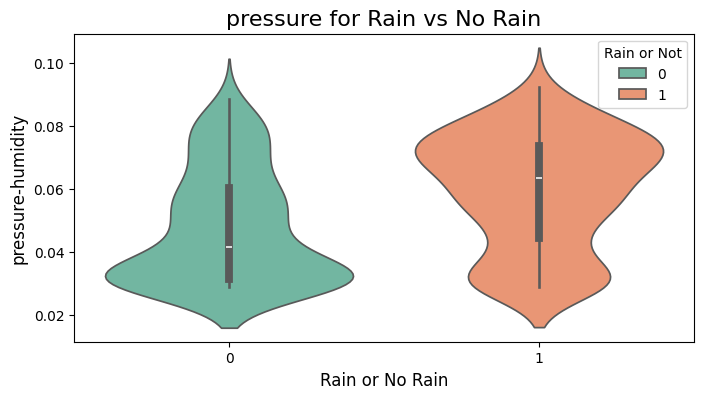

In [47]:

plt.figure(figsize=(8, 4))

sns.violinplot(data=df, x='rain', y='pressure-humidity', hue='rain', palette='Set2')

plt.title('pressure for Rain vs No Rain', fontsize=16)
plt.xlabel('Rain or No Rain', fontsize=12)
plt.ylabel('pressure-humidity', fontsize=12)
plt.legend(title='Rain or Not')
plt.show()

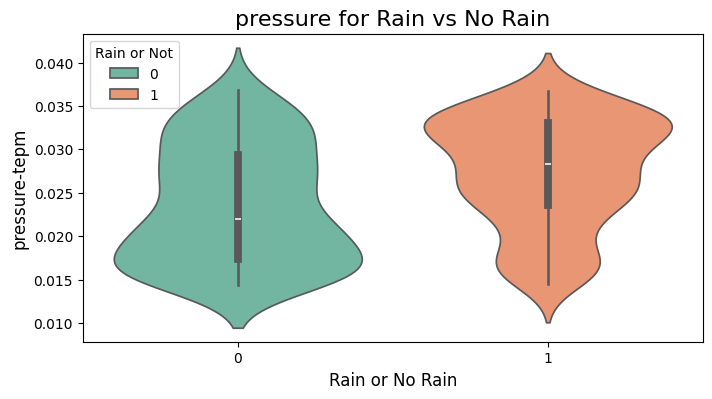

In [48]:
plt.figure(figsize=(8, 4))

sns.violinplot(data=df, x='rain', y='pressure-tepm', hue='rain', palette='Set2')

plt.title('pressure for Rain vs No Rain', fontsize=16)
plt.xlabel('Rain or No Rain', fontsize=12)
plt.ylabel('pressure-tepm', fontsize=12)
plt.legend(title='Rain or Not')
plt.show()

In [49]:
'''
## this does not show significant effect - no need to take this to the account
plt.figure(figsize=(8, 4))

sns.violinplot(data=df, x='rain', y='wind-humidity', hue='rain', palette='Set2')

plt.title('pressure for Rain vs No Rain', fontsize=16)
plt.xlabel('Rain or No Rain', fontsize=12)
plt.ylabel('wind-humidity', fontsize=12)
plt.legend(title='Rain or Not')
plt.show()
'''

"\n## this does not show significant effect - no need to take this to the account\nplt.figure(figsize=(8, 4))\n\nsns.violinplot(data=df, x='rain', y='wind-humidity', hue='rain', palette='Set2')\n\nplt.title('pressure for Rain vs No Rain', fontsize=16)\nplt.xlabel('Rain or No Rain', fontsize=12)\nplt.ylabel('wind-humidity', fontsize=12)\nplt.legend(title='Rain or Not')\nplt.show()\n"

In [50]:
df.head(10)

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,season,day_of_week,day_season_plus,day_m_season,rain,...,rolling_avg_humidity,rain_precentage_of_season,rain_precentage_of_day,humidity_vs_temp,pressure-humidity,pressure-tepm,wind-humidity,pressure-humidity_M_pressure-tepm,temp+,hum+
0,23.745401,46.140905,7.845981,20.851051,992.965681,1,6,7,6,1,...,54.244075,0.809524,0.652174,1095.634291,0.046468,0.023914,5.880833,0.001111,23.745401,-8.103170
1,30.030503,59.876587,5.382457,93.059521,1037.273025,1,0,1,0,1,...,54.244075,0.809524,0.452830,1798.124013,0.057725,0.028951,11.124396,0.001671,30.030503,5.632512
2,28.365224,51.464618,13.158008,11.636640,1034.193357,1,1,2,1,1,...,54.244075,0.809524,0.607843,1459.805433,0.049763,0.027427,3.911277,0.001365,28.365224,-2.779456
3,27.550929,53.103799,5.886677,81.744971,968.610142,1,2,3,2,1,...,54.244075,0.809524,0.596154,1463.059034,0.054825,0.028444,9.021015,0.001559,27.550929,-1.140276
4,23.639303,57.826186,12.248992,38.062329,1030.264331,1,3,4,3,1,...,54.244075,0.809524,0.528302,1366.970748,0.056128,0.022945,4.720894,0.001288,23.639303,3.582111
5,24.148136,49.703435,6.587024,87.797432,995.818689,1,4,5,4,1,...,54.244075,0.809524,0.519231,1200.245286,0.049912,0.024250,7.545659,0.001210,24.148136,-4.540640
6,23.671006,63.997418,5.654166,86.805669,998.296887,1,5,6,5,1,...,54.587564,0.809524,0.540000,1514.883276,0.064107,0.023711,11.318630,0.001520,-2.207637,9.409854
7,32.245441,67.083073,6.940197,80.592540,963.347997,1,6,7,6,1,...,57.579302,0.809524,0.652174,2163.123262,0.069635,0.033472,9.665875,0.002331,5.152506,9.503770
8,30.078517,64.088581,4.520668,79.003044,958.060151,1,0,1,0,1,...,58.181016,0.809524,0.452830,1927.689433,0.066894,0.031395,14.176794,0.002100,2.978723,5.907565
9,31.620631,71.876470,11.214141,30.467914,1022.793931,1,1,2,1,1,...,61.096995,0.809524,0.607843,2272.779317,0.070275,0.030916,6.409450,0.002173,4.055779,10.779475


In [51]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,season,day_of_week,day_season_plus,day_m_season,rain,...,rolling_avg_humidity,rain_precentage_of_season,rain_precentage_of_day,humidity_vs_temp,pressure-humidity,pressure-tepm,wind-humidity,pressure-humidity_M_pressure-tepm,temp+,hum+
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,25.685172,54.091392,7.476032,50.212560,1000.950137,2.521008,2.935574,5.490196,7.661064,0.554622,...,54.244075,0.554622,0.554622,1504.232251,0.054071,0.025684,18.304636,0.001505,0.397414,-0.152683
std,6.738117,18.925293,5.013912,27.914481,28.696900,1.001533,1.981316,2.244354,6.286688,0.497705,...,16.948070,0.137016,0.061205,825.724028,0.018936,0.006795,38.767808,0.000830,4.824029,8.468304
min,15.000000,30.000000,0.069480,0.321826,951.240404,1.000000,0.000000,1.000000,0.000000,0.000000,...,30.000000,0.413793,0.452830,450.000000,0.028612,0.014370,1.019921,0.000413,-12.434951,-33.472557
25%,19.649738,33.730270,3.776986,27.625995,975.653006,2.000000,1.000000,4.000000,3.000000,0.000000,...,38.244414,0.413793,0.519231,646.561289,0.033219,0.019671,4.814970,0.000654,-1.972301,-4.215104
50%,25.983840,55.041385,7.556636,49.834827,1002.339091,2.000000,3.000000,5.000000,6.000000,1.000000,...,54.244075,0.523364,0.540000,1430.186520,0.054819,0.025915,7.283847,0.001452,0.145677,-0.120678
75%,31.766657,71.850031,10.608580,74.807318,1026.551290,3.000000,5.000000,7.000000,12.000000,1.000000,...,69.488115,0.605634,0.607843,2272.779317,0.071148,0.031889,14.198795,0.002253,1.969885,4.105744
max,35.000000,90.000000,56.636041,99.834751,1049.543752,4.000000,6.000000,10.000000,24.000000,1.000000,...,82.707398,0.809524,0.652174,3150.000000,0.092100,0.036793,431.776785,0.003299,30.030503,37.859096


In [52]:
#Thsese featurs make model less accurate
            #'rain_precentage_of_day',
            #'day_m_season',
            #'temp+',
            #'hum+',
            #'pressure-tepm',
            #'pressure-humidity',
            #'humidity',
            #'avg_temperature',

features = [
            'pressure',
            'avg_wind_speed',
            'cloud_cover',
            'rolling_avg_humidity',
            'rolling_avg_temp',
            'humidity_vs_temp',
            'day_of_week',
            'day_season_plus',
            'rain_precentage_of_season',
            ]
target = ['rain']



In [53]:
## this function is for normalizing
from sklearn.preprocessing import MinMaxScaler

def normalize_columns(df, columns_to_normalize):

    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df

normalized_df  =  normalize_columns(df, features)

In [54]:
#resampled_df.describe()

In [55]:
train_size = int(len(df)-21)

train = normalized_df[:train_size]
test = normalized_df[train_size:]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [56]:

y_test = y_test.values.flatten()
y_train = y_train.values.flatten()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=10000, solver='liblinear')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 8  2]
 [ 1 10]]


In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8571428571428571


In [58]:
df['rain'].value_counts()

,count
rain,
1,198
0,159


Seems like there is a huge different between sample sets.. lets make it lower by oversammpling